# <u> Outils de visualisation </u>:

### <u> Objectif </u>:
A partir d’un jeu de données libre, réaliser une visualisation de votre choix.

### <u> Résolution </u>:
Dans le cadre de ce projet, j'ai choisi de travailler avec un dataset venant de kaggle : https://www.kaggle.com/code/youssefabdelghfar/global-suicide-rates/input. Ce dataset porte sur le taux de suicide dans le monde.

### <u> Table des matières </u>:
Pour réaliser ce projet nous allons suivre ce plan détaillé :

- Extraction des données du dataset
- Exploration des données
- Nettoyage et tranformation des données
- Visualisation des données

Avant tout cela il est important de noter que ce projet contient un fichier requirements contenant toutes les librairies necessaire pour la réalisation du projet.

Lorsque vous initialisez le projet, il faut installer toutes les librairies avec la commande suivante :

```python
pip install -r requirements.txt # Pour Windows

pip3 install -r requirements.txt # Pour MacOs
```

Alternativement, vous pouvez créer un environnement virtuel pour garder les librairies isolées:

```shell
python -m venv venv

source venv/bin/activate  # On macOS/Linux
venv\Scripts\activate  # On Windows

pip install -r requirements.txt
```

### <u> Etapes </u>:

- [X] Extraction des données du dataset
- [X] Exploration des données
- [X] Nettoyage et tranformation des données
- [X] Visualisation des données

In [79]:
# Importation des librairies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Extraction des données

In [86]:
def extract_data(path: str, sep: str =',', encoding='utf-8'):
    """
    Charge un fichier CSV dans un DataFrame.

    Paramètres :
    - path : chemin vers le fichier CSV
    - sep : séparateur utilisé dans le fichier (par défaut ',')
    - encoding : encodage du fichier (par défaut 'utf-8')

    Retour :
    - DataFrame chargé
    """

    try:
        dataset = pd.read_csv(path, sep=sep, encoding=encoding)
        print(f"Shape du dataset : {dataset.shape[0]} lignes, {dataset.shape[1]} colonnes\n")
        return dataset

    except FileNotFoundError:
        print(f"Erreur : Fichier non trouvé à l'emplacement : {path}")

    except pd.errors.ParserError:
        print(f"Erreur : Problème lors de la lecture du fichier. Vérifiez le séparateur ou l'encodage.")

    except Exception as e:
        print(f"Une erreur inattendue est survenue : {e}")

In [81]:
dataset = extract_data('/content/sample_data/Dataset_Final.csv')

Shape du dataset : 1421 lignes, 13 colonnes



# Exploration des données (EDA)

In [83]:
# Cette fonction permet d'explorer les données du dataset

def explorate_data(file: pd.DataFrame):
  """
    Explore rapidement un DataFrame.

    Paramètres :
    - df : DataFrame à explorer
  """

  print(f"Ce dataset contient {file.shape[0]} lignes et {file.shape[1]} colonnes \n\n") # Afficher le nombre de ligne et de colonne
  print(f"Il contient des données de types : \n {file.dtypes} \n\n") # Afficher les types des données
  print(f"Les cinq premières lignes de notre dataset sont : \n {file.head()} \n\n") # Afficher les quelques lignes du dataset
  print(file.describe(include='all') ) # Donner la description du fichier
  print(f"les valeurs uniques de notre dataset sont les suivantes :\n\n {file.nunique()} \n\n") # Afficher les valeurs uniques du dataset

In [84]:
# Fonction pour montrer la corrélation entre les données

def correlate_data(file: pd.DataFrame, title: str):
  """
    Affiche une heatmap de corrélation entre les colonnes numériques d'un DataFrame.

    Paramètres :
    - file : DataFrame à analyser
    - title : titre du graphique
  """

  # 1. Garder seulement les colonnes numériques
  dataset_numeric = file.select_dtypes(include=['number'])

  # 2. Tracer la heatmap de corrélation
  plt.figure(figsize=(10,8))
  sns.heatmap(dataset_numeric.corr(), annot=True, cmap='coolwarm')
  plt.title(title)
  plt.show()

Ce dataset contient 1421 lignes et 13 colonnes 


Il contient des données de types : 
 Country                             object
Year                                 int64
Suicides_number                    float64
Life_expectancy                    float64
Adult_mortality                    float64
Infant_deaths                        int64
Alcohol                            float64
Under-five_deaths                    int64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
Income_composition_of_resources    float64
Schooling                          float64
dtype: object 


Les cinq premières lignes de notre dataset sont : 
    Country  Year  Suicides_number  Life_expectancy  Adult_mortality  \
0  Albania  2000             54.0             72.6             11.0   
1  Albania  2001            119.0             73.6             14.0   
2  Albania  2002            133.0             73.3             15.0   
3

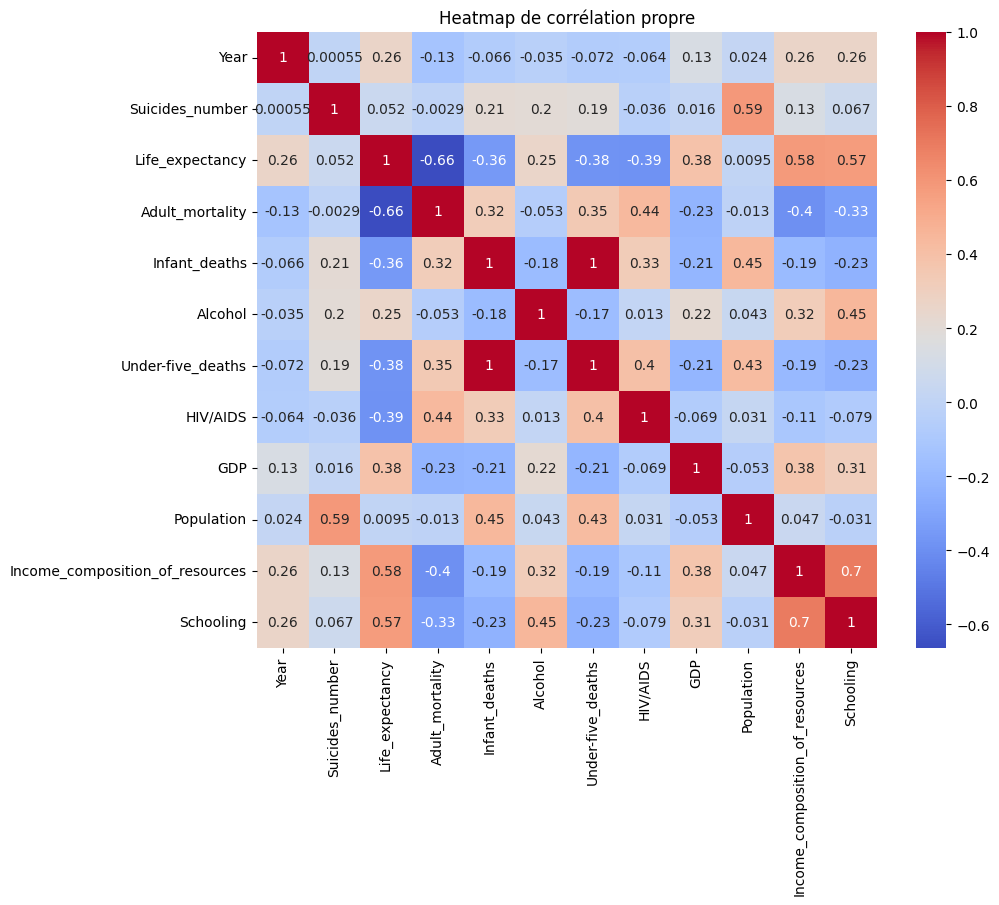

In [85]:
# appel des fonctions d'exploration des données

explorate_data(dataset)
correlate_data(dataset, 'Heatmap de corrélation propre')

# Nettoyage et transformation des données

In [90]:
# Fonctions de nettoyage et tranformation des données

def clean_data(file: pd.DataFrame, year_col: str='Year'):
  """
    Nettoie un DataFrame :
    - Supprime les lignes avec des valeurs négatives dans certaines colonnes
    - Remplace les 0 dans la colonne GDP par NaN puis remplit avec la moyenne
    - Convertit la colonne Year en entier

    Paramètres :
    - df : DataFrame à nettoyer
    - year_col : nom de la colonne de l'année (par défaut 'Year')

    Retour :
    - DataFrame nettoyé
  """

  dataset = file[file['Life_expectancy'] > 0]
  dataset = file[file['Adult_mortality'] > 0]

  # Remplacer les 0 suspects dans GDP par NaN puis interpoler:
  file['GDP'] = file['GDP'].replace(0, np.nan)
  file['GDP'] = file['GDP'].fillna(file['GDP'].mean())

  # Par exemple, transformer year en type int si ce n’est pas déjà fait:
  file[year_col] = file[year_col].astype(int)

In [91]:
clean_data(dataset)

# Visualisation des données

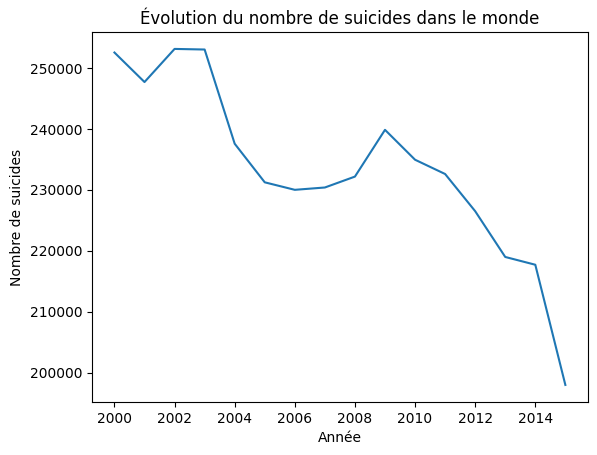

In [94]:
# Visualisation de l'évolution des suicides dans le monde au fil du temps

def draw_evolution(file: pd.DataFrame, x: str, y: str, title: str, xlabel: str, ylabel: str):
  """
    Trace une courbe d'évolution d'une variable au fil du temps.

    Paramètres :
    - file : DataFrame contenant les données
    - x : colonne pour l'axe X (ex : année)
    - y : colonne pour l'axe Y (ex : nombre de suicides)
    - title : titre du graphique
    - xlabel : label de l'axe X
    - ylabel : label de l'axe Y
  """
  file.groupby(x)[y].sum().plot(kind='line')
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

draw_evolution(
    dataset,
    'Year',
    'Suicides_number',
    'Évolution du nombre de suicides dans le monde',
    'Année',
    'Nombre de suicides')

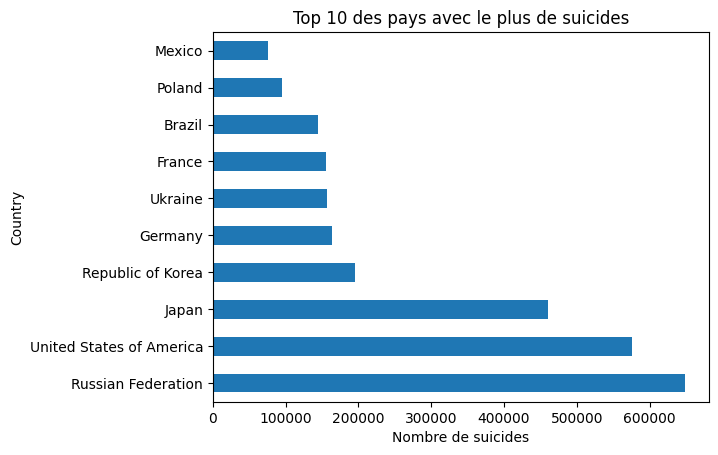

In [93]:
# comparaison des pays avec le plus de suicides (classement)

def rate_country(file: pd.DataFrame, x: str, y: str, title: str, xlabel: str, ylabel: str, rate: int):
  """
    Affiche un bar chart classant les pays ou autres catégories par somme d'une variable.

    Paramètres :
    - file : DataFrame contenant les données
    - x : colonne dont on veut sommer les valeurs (ex : 'Suicides_number')
    - y : colonne pour le regroupement (ex : 'Country')
    - title : titre du graphique
    - xlabel : label de l'axe X
    - ylabel : label de l'axe Y
    - rate : nombre d'éléments à afficher (par défaut 10)
    """
  file.groupby(x)[y].sum().sort_values(ascending=False).head(rate).plot(kind='barh')
  plt.title(title)
  plt.xlabel(xlabel)

rate_country(
    dataset,
    'Country',
    'Suicides_number',
    f'Top {10} des pays avec le plus de suicides',
    'Nombre de suicides',
    'Pays',
    10)

In [95]:
def plot_suicide_rate_map(file: pd.DataFrame, population_col: str, suicide_col: str, country_col: str, color_scale: str='Reds'):
    """
    Crée une carte choropleth du taux de suicide pour 100 000 habitants par pays.

    Paramètres :
    - file : DataFrame contenant les données
    - population_col : nom de la colonne pour la population
    - suicide_col : nom de la colonne pour le nombre de suicides
    - country_col : nom de la colonne pour les pays
    - color_scale : échelle de couleur pour la carte (par ex : 'Reds', 'Blues', 'Viridis')
    """

    # 1. Calcul du taux de suicide pour 100 000 habitants
    file['suicide_rate'] = (file[suicide_col] / file[population_col]) * 100000

    # 2. Groupement par pays (moyenne du taux de suicide)
    suicide_by_country = file.groupby(country_col)['suicide_rate'].mean().reset_index()

    # 3. Création de la carte
    fig = px.choropleth(
        suicide_by_country,
        locations=country_col,
        locationmode="country names",
        color="suicide_rate",
        color_continuous_scale=color_scale,
        title="Taux de suicide dans le monde (par 100 000 habitants)"
    )

    fig.update_layout(
        geo=dict(showframe=False, showcoastlines=True, projection_type='equirectangular')
    )

    fig.show()


plot_suicide_rate_map(dataset, 'Population', 'Suicides_number', 'Country', 'Reds')

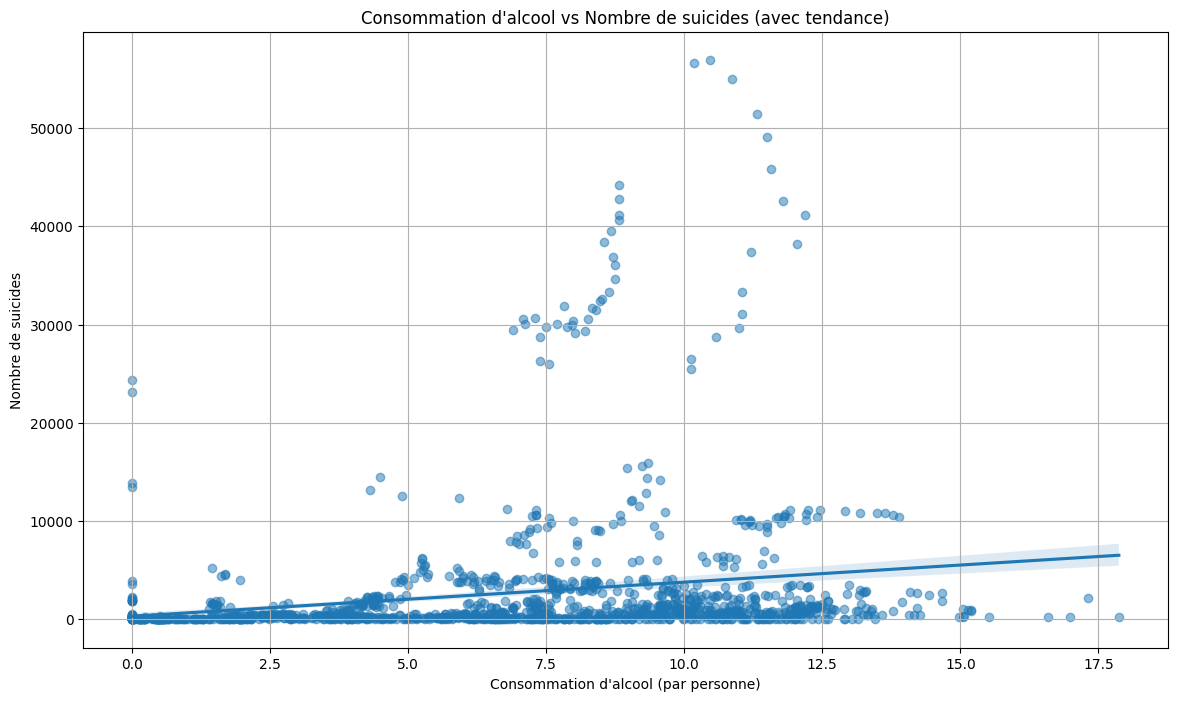

In [96]:
# Lien entre l’alcool et les suicides

def plot_regression(file: pd.DataFrame, x: str, y: str, title: str, x_label, y_label, scatter_alpha=0.5, figsize=(14,8)):
    """
    Trace un graphique de régression linéaire entre deux colonnes d'un DataFrame.

    Paramètres :
    - file : DataFrame contenant les données
    - x : nom de la colonne pour l'axe X
    - y : nom de la colonne pour l'axe Y
    - title : titre du graphique
    - x_label : label pour l'axe X
    - y_label : label pour l'axe Y
    - scatter_alpha : transparence des points (entre 0 et 1)
    - figsize : taille de la figure (tuple)
    """

    plt.figure(figsize=figsize)
    sns.regplot(x=x, y=y, data=file, scatter_kws={'alpha': scatter_alpha})
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.show()


plot_regression(
    dataset,
    'Alcohol',
    'Suicides_number',
    'Consommation d\'alcool vs Nombre de suicides (avec tendance)',
    'Consommation d\'alcool (par personne)',
    'Nombre de suicides'
)

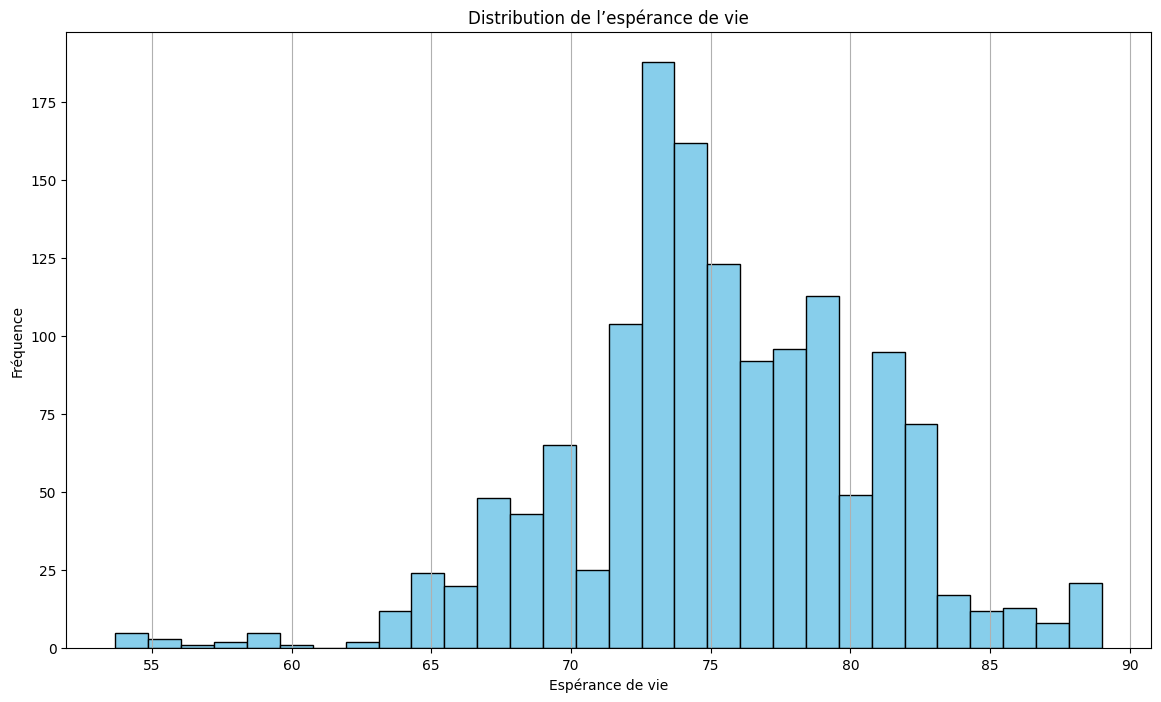

In [103]:
# Distribution de l’espérance de vie

import matplotlib.pyplot as plt

def plot_histogram(file: pd.DataFrame, column: str, title: str, x_label, y_label, color='skyblue', figsize=(14,8), bins=30):
    """
    Trace un histogramme pour une colonne spécifique d'un DataFrame.

    Paramètres :
    - file : DataFrame contenant les données
    - column : nom de la colonne à tracer
    - bins : nombre de classes (par défaut 30)
    - title : titre du graphique
    - x_label : label pour l'axe X
    - y_label : label pour l'axe Y
    - color : couleur des barres de l'histogramme
    - figsize : taille de la figure (tuple)
    """

    plt.figure(figsize=figsize)
    file[column].hist(bins=bins, color=color, edgecolor='black')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(axis='y')
    plt.show()


plot_histogram(
    file=dataset,
    column='Life_expectancy',
    title="Distribution de l’espérance de vie",
    x_label="Espérance de vie",
    y_label="Fréquence"
)


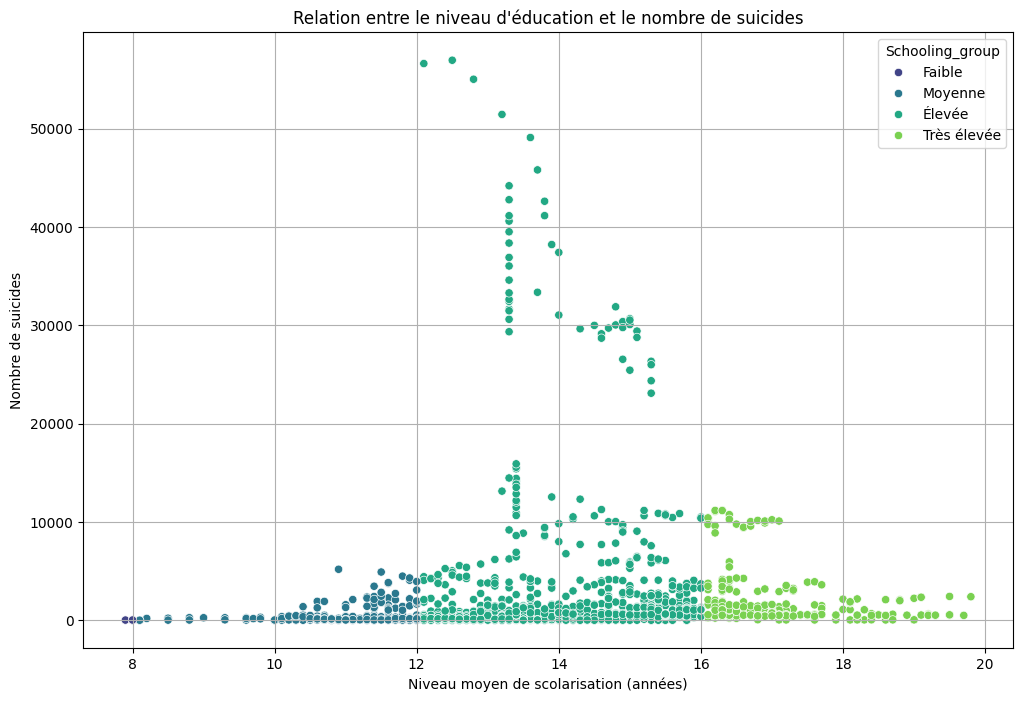

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_colored_scatter(file: pd.DataFrame, x_col: str, y_col: str, group_col: str, bins: list[int], labels: list[str], title: str, x_label: str, y_label: str, figsize=(12,8), palette='viridis'):
    """
    Trace un scatter plot coloré par groupe de valeurs discrétisées.

    Paramètres :
    - file : DataFrame contenant les données
    - x_col : colonne pour l'axe X
    - y_col : colonne pour l'axe Y
    - group_col : nouveau nom de la colonne de groupes
    - bins : liste des intervalles pour créer les groupes
    - labels : liste des labels pour les groupes
    - title : titre du graphique
    - x_label : label pour l'axe X
    - y_label : label pour l'axe Y
    - figsize : taille de la figure (tuple)
    - palette : palette de couleurs pour la visualisation
    """

    # Créer les groupes
    file[group_col] = pd.cut(file[x_col], bins=bins, labels=labels)

    # Tracer le scatter plot
    plt.figure(figsize=figsize)
    sns.scatterplot(x=x_col, y=y_col, hue=group_col, data=file, palette=palette)

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.legend(title=group_col)
    plt.show()

plot_colored_scatter(
    dataset,
    'Schooling',
    'Suicides_number',
    'Schooling_group',
    [0,8,12,16,20],
    ['Faible', 'Moyenne', 'Élevée', 'Très élevée'],
    title='Relation entre le niveau d\'éducation et le nombre de suicides',
    x_label='Niveau moyen de scolarisation (années)',
    y_label='Nombre de suicides',
    figsize=(12,8)
)
